In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

unemployment = pd.read_csv("/kaggle/input/global-unemployment-data/global_unemployment_data.csv")
unemployment.head()

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087


# Summaries with .groupby() and .agg()

In this exercise, you'll explore the means and standard deviations of the yearly unemployment data. First, you'll find means and standard deviations regardless of the continent to observe worldwide unemployment trends. Then, you'll check unemployment trends broken down by continent.


* Print the mean and standard deviation of the unemployment rates for each year (in that order).
* Print the mean and standard deviation (in that order) of the unemployment rates for each year, grouped by continent.

In [3]:
# Select only the numeric columns (years) for aggregation
numeric_columns = unemployment.columns[5:]  # Skipping 'Country Name' .............

# Print the mean and standard deviation of unemployment rates by year
print(unemployment[numeric_columns].agg(["mean", "std"]))


           2014       2015       2016       2017       2018       2019  \
mean  11.387800  11.272444  11.122963  10.863516  10.516499  10.311452   
std   11.119002  10.915942  10.742947  10.640980  10.527773  10.297952   

           2020       2021       2022      2023      2024  
mean  11.851285  11.422645  10.340361  9.985181  9.940089  
std   11.231580  10.873412  10.264810  9.987778  9.977512  


In [5]:
numeric_columns1 = unemployment.columns[3:]
# Drop the 'age_categories' column if it's part of the numeric columns
numeric_columns1 = numeric_columns1.drop("age_categories")
print(numeric_columns1)


Index(['age_group', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024'],
      dtype='object')


In [7]:
# Print yearly mean and standard deviation grouped by continent
print(unemployment[numeric_columns1].groupby("age_group").agg(["mean", "std"]))

                2014                  2015                  2016             \
                mean        std       mean        std       mean        std   
age_group                                                                     
15-24      18.854103  14.422729  18.629524  14.078608  18.408087  13.754494   
25+         6.744701   5.706001   6.703299   5.667096   6.605267   5.642336   
Under 15    8.564595   6.743752   8.484511   6.692271   8.355534   6.668317   

                2017                  2018             ...       2020  \
                mean        std       mean        std  ...       mean   
age_group                                              ...              
15-24      18.016397  13.646478  17.517347  13.603987  ...  19.807981   
25+         6.440209   5.610607   6.201474   5.498288  ...   6.993198   
Under 15    8.133942   6.648268   7.830677   6.538108  ...   8.752675   

                           2021                  2022                  2023  \
       

Nicely done! This data is well-summarized, but it's a little long. What if you wanted to focus on a summary for just one year and make it more readable? Give it a go in the next exercise!

# Named aggregations

You've seen how .groupby() and .agg() can be combined to show summaries across categories. Sometimes, it's helpful to name new columns when aggregating so that it's clear in the code output what aggregations are being applied and where.

Your task is to create a DataFrame called continent_summary which shows a row for each continent. The DataFrame columns will contain the mean unemployment rate for each continent in 2021 as well as the standard deviation of the 2021 employment rate. And of course, you'll rename the columns so that their contents are clear!


Create a column called mean_rate_2021 which shows the mean 2021 unemployment rate for each continent.
Create a column called std_rate_2021 which shows the standard deviation of the 2021 unemployment rate for each continent

In [8]:
age_group_summary = unemployment.groupby("age_group").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021= ("2021", "mean"),
    # Create the std_rate_2021 column
    std_rate_2021=("2021", "std")
)
print(age_group_summary)

           mean_rate_2021  std_rate_2021
age_group                               
15-24           18.884648      13.863622
25+              6.876042       5.702405
Under 15         8.507243       6.747246


# Visualizing categorical summaries

As you've learned in this chapter, Seaborn has many great visualizations for exploration, including a bar plot for displaying an aggregated average value by category of data.

In Seaborn, bar plots include a vertical bar indicating the 95% confidence interval for the categorical mean. Since confidence intervals are calculated using both the number of values and the variability of those values, they give a helpful indication of how much data can be relied upon.

Your task is to create a bar plot to visualize the means and confidence intervals of unemployment rates across the different continents.


* Create a bar plot showing continents on the x-axis and their respective average 2021 unemployment rates on the y-axis.


The bar plot shows unemployment rates in 2021 across different age groups: "15-24", "25+", and "Under 15." Here's a summary based on the plot:

Highest Unemployment Rate: The age group "15-24" has the highest average unemployment rate, nearing 20%.
Moderate Unemployment Rate: The age group "Under 15" has a lower unemployment rate, hovering around 10%.
Lowest Unemployment Rate: The age group "25+" has the lowest unemployment rate, around 7-8%.
This suggests that younger individuals, particularly in the "15-24" age group, faced the highest unemployment challenges in 2021 compared to the other age groups. The error bars indicate some level of variability or uncertainty in the data for each group.

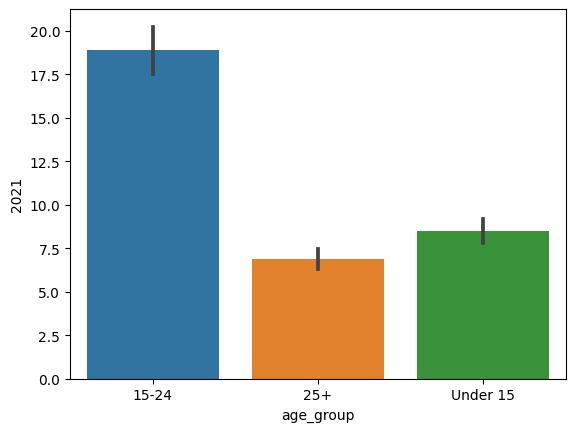

In [9]:
# Create a bar plot of continents and their average unemployment
sns.barplot(x = "age_group", y="2021", data =unemployment)
plt.show()


The bar plot shows unemployment rates in 2021 across different age groups: "15-24", "25+", and "Under 15." Here's a summary based on the plot:

Highest Unemployment Rate: The age group "15-24" has the highest average unemployment rate, nearing 20

Moderate Unemployment Rate: The age group "Under 15" has a lower unemployment rate, hovering around 10%.

Lowest Unemployment Rate: The age group "25+" has the lowest unemployment rate, around 7-8%.

**This suggests that younger individuals, particularly in the "15-24" age group, faced the highest unemployment challenges in 2021 compared to the other age groups. The error bars indicate some level of variability or uncertainty in the data for each group.**